# Numerical Simulation Laboratory

# Numerical exercise 10

## Exercise 11.1
Valuto il comportamento della regressione lineare effettuata tramite la rete neurale variando il numero di epoche, il numero di valori di training e il rumore dei dati di validazione. Per questo esercizio utilizzo una rete neurale semplice composta da un singolo neurone come nell'esempio riportato nel *notebook* relativo all'undicesima esercitazione: il codice utilizzato è riportato nello specchietto sottostante.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">model = Sequential()</font><br />
<font face="Courier">model.add(Dense(1, input_shape=(1,))) </font><br />
    <font face="Courier">model.compile(optimizer='sgd', loss='mse', metrics=['mse'])</font> <br />
</p>

### <font color='blue'> Epochs </font> 
Valuto la regressione lineare effettuata dalla rete neurale variando il numero di epoche ovvero il numero di iterazioni sull'intero insieme di dati in input. 
Per ogni grafico ho utilizzato $100$ valori di training e $15$ dati di validazione in assenza di rumore.
I grafici ottenuti mostrano che la predizione della rete neurale diventa precisa effettuando molte iterazioni sui dati di input.

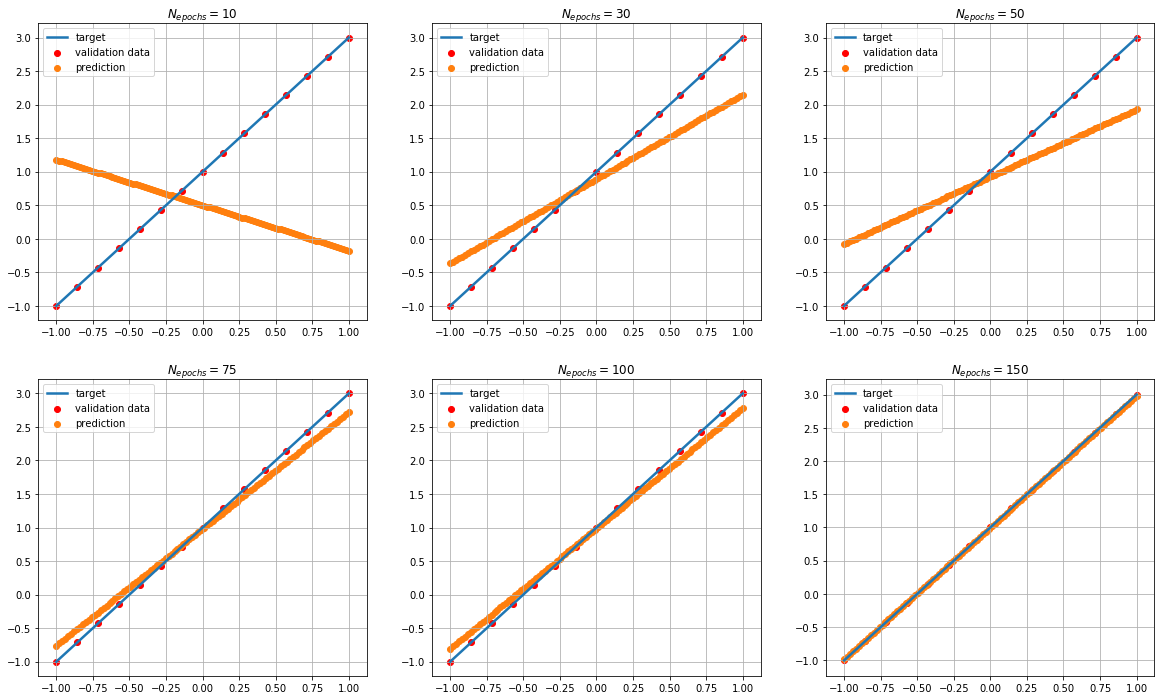

In [34]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def target(x):
    return 2*x + 1

plt.figure(figsize=(20, 12))
sub = [231, 232, 233, 234, 235, 236]
NN = ['10', '30', '50', '75', '100', '150']

sigma = 0
np.random.seed(0)
x_valid = np.linspace(-1, 1, 15)
y_valid = np.random.normal( target(x_valid), sigma )
x_predicted = np.linspace(-1, 1, 100)

for i in range(6):
    savedpath = "Saved/exercise1/modelNep" + str(NN[i])
    model = tf.keras.models.load_model(filepath=savedpath)
    y_predicted = model.predict(x_predicted).reshape(-1)

    plt.subplot(sub[i])
    title = "$N_{epochs} = " + str(NN[i]) + "$"
    plt.title(title)
    plt.scatter(x_valid, y_valid, color='r', label='validation data') #dati per validazione    
    plt.scatter(x_predicted, y_predicted, color='tab:orange', label='prediction') #predizione NN
    plt.plot(x_predicted, target(x_predicted), label='target', lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

### <font color='blue'> Training data </font> 
Valuto il comportamento della regressione lineare variando il numero di dati di training. Per ogni grafico ho utilizzato $30$ epoche e $15$ dati di validazione in assenza di rumore.
I grafici ottenuti mostrano che la predizione della rete neurale diventa precisa utilizzando un insieme grande di dati di training in input.

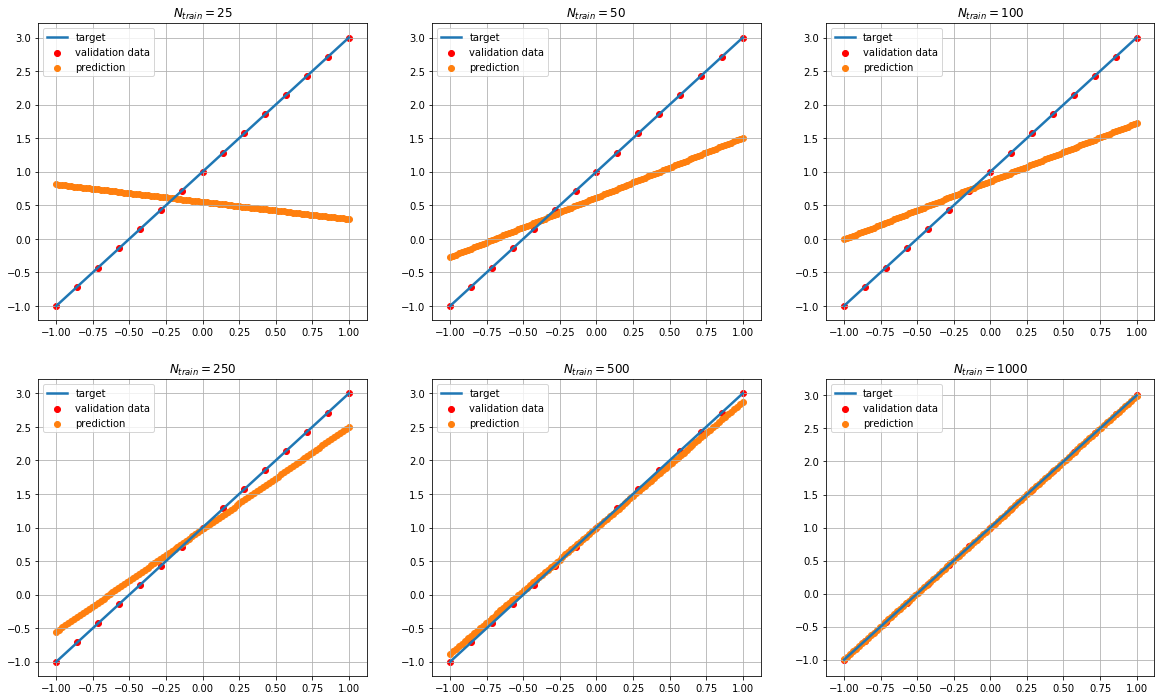

In [35]:
def target(x):
    return 2*x + 1

plt.figure(figsize=(20, 12))
sub = [231, 232, 233, 234, 235, 236]
NN = [25, 50, 100, 250, 500, 1000]

sigma = 0
np.random.seed(0)
x_valid = np.linspace(-1, 1, 15)
y_valid = np.random.normal( target(x_valid), sigma )
x_predicted = np.linspace(-1, 1, 100)

for i in range(6):
    savedpath = "Saved/exercise1/modelNtrain" + str(NN[i])
    model = tf.keras.models.load_model(filepath=savedpath)
    y_predicted = model.predict(x_predicted).reshape(-1)

    plt.subplot(sub[i])
    title = "$N_{train} = " + str(NN[i]) + "$"
    plt.title(title)
    plt.scatter(x_valid, y_valid, color='r', label='validation data') #dati per validazione    
    plt.scatter(x_predicted, y_predicted, color='tab:orange', label='prediction') #predizione NN
    plt.plot(x_predicted, target(x_predicted), label='target', lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

### <font color='blue'> Rumore </font> 
Valuto il comportamento della regressione lineare introducendo del rumore nei dati di validazione.
Per ogni grafico ho utilizzato $100$ epoche, $1000$ dati di training e $15$ dati di validazione.
I grafici ottenuti mostrano che, anche in presenza di rumore, utilizzando un numero elevato di dati e di iterazioni la predizione della rete neurale rimane precisa.

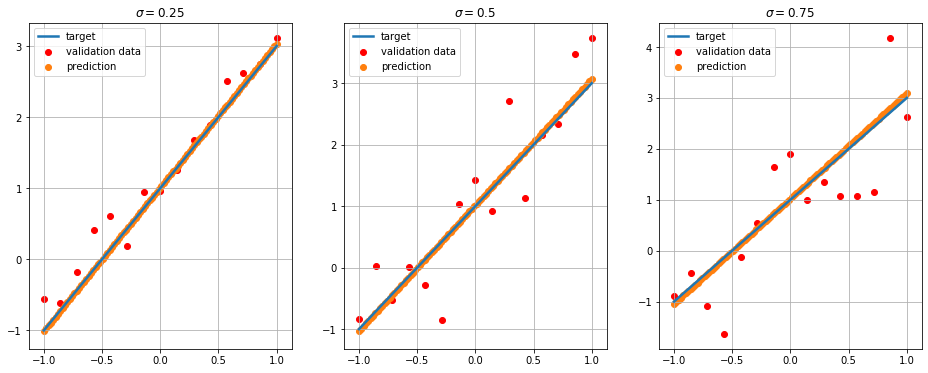

In [36]:
def target(x):
    return 2*x + 1

NN = [0.25, 0.50, 0.75]
sub = [131, 132, 133]
plt.figure(figsize=(16, 6))

np.random.seed(0)
x_valid = np.linspace(-1, 1, 15)
x_predicted = np.linspace(-1, 1, 100)

for i in range(3):
    sigma = NN[i]
    y_valid = np.random.normal( target(x_valid), sigma )
    savedpath = "Saved/exercise1/modelsigma" + str(sigma)
    model = tf.keras.models.load_model(filepath=savedpath)
    y_predicted = model.predict(x_predicted).reshape(-1)

    plt.subplot(sub[i])
    title = "$\sigma = " + str(NN[i]) + "$"
    plt.title(title)
    plt.scatter(x_valid, y_valid, color='r', label='validation data') #dati per validazione    
    plt.scatter(x_predicted, y_predicted, color='tab:orange', label='prediction') #predizione NN
    plt.plot(x_predicted, target(x_predicted), label='target', lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

## Exercise 11.2

Sviluppo e testo una rete neurale per effettuare la regressione della funzione $f(x)=4-3x-2x^2+3x^3$ nell'intervallo $x \in [-1,1]$. Utilizzo una rete formata da tre strati e testo il risultato ottenuto per la regressione variando di volta in volta il numero di neuroni, la funzione di attivazione, l'ottimizzatore e la funzione *loss*. 

Ciascun test di cui ho riportato i risultati nei grafici seguenti, è stato effettuato sfruttando un set di $1000$ dati di training, $15$ dati di validazione con un rumore medio $\sigma = 0.2$ e itero sui dati in input per $150$ epoche.

### <font color='blue'> Numero di neuroni </font>
Valuto il comportamento di una rete neurale formata da tre layer, aumentando progressivamente il numero di neuroni presenti nel layer di input e nel layer intermedio.
Mantengo costanti le altre caratteristiche della rete, qui riportate:

- **Activation function**: funzione standard *relu*
- **Loss function**: mean squared error
- **Optimizer**: stochastic gradient descent

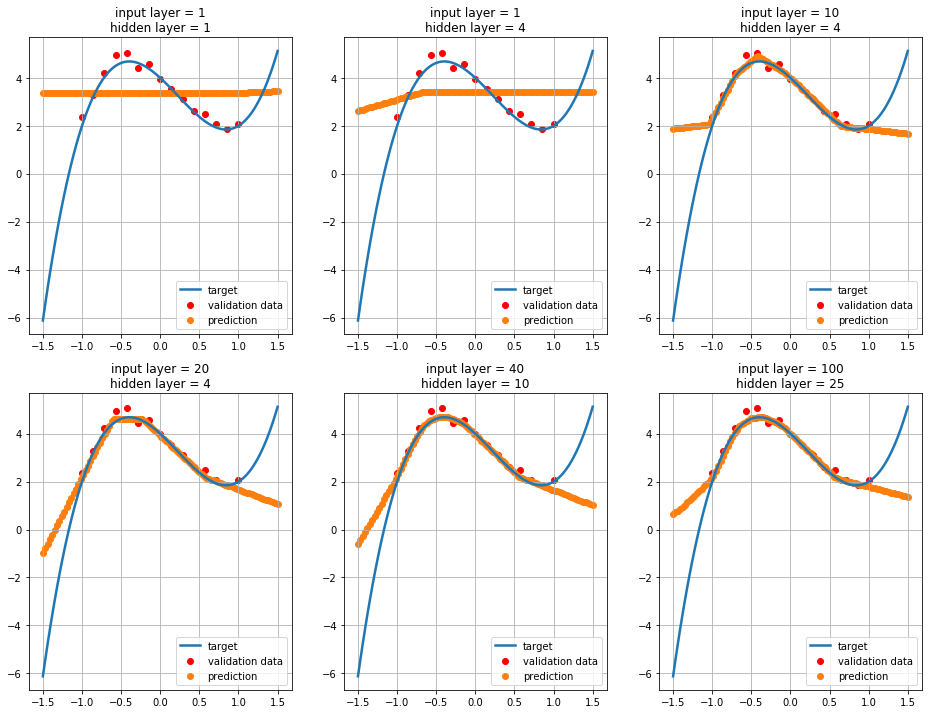

In [63]:
def target(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

plt.figure(figsize=(16, 12))
inputL = [1, 1, 10, 20, 40, 100]
hiddenL = [1, 4, 4, 4, 10, 25]
sub = [231, 232, 233, 234, 235, 236]

sigma = 0.2
np.random.seed(0)
x_valid = np.linspace(-1, 1, 15)
y_valid = np.random.normal( target(x_valid), sigma )
x_predicted = np.linspace(-1.5, 1.5, 100)

for i in range(6):
    savedpath = "Saved/exercise2/Neurons/modelNN" + str(i+1)
    model = tf.keras.models.load_model(filepath=savedpath)
    y_predicted = model.predict(x_predicted).reshape(-1)
    
    plt.subplot(sub[i])
    title = 'input layer = ' + str(inputL[i]) + "\n" + "hidden layer = " + str(hiddenL[i])
    plt.title(title)
    plt.scatter(x_valid, y_valid, color='r', label='validation data') #dati per validazione    
    plt.scatter(x_predicted, y_predicted, color='tab:orange', label='prediction') #predizione NN
    plt.plot(x_predicted, target(x_predicted), label='target', lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

### <font color='blue'> Activation Function </font>
Utilizzando la rete neurale più complessa, formata da 100 neuroni nel layer di input e 25 nel layer intermedio, valuto il comportamento della regressione variando la funzione di attivazione. Mantengo costanti le altre caratteristiche della rete, qui riportate:

- **Loss function**: mean squared error
- **Optimizer**: stochastic gradient descent

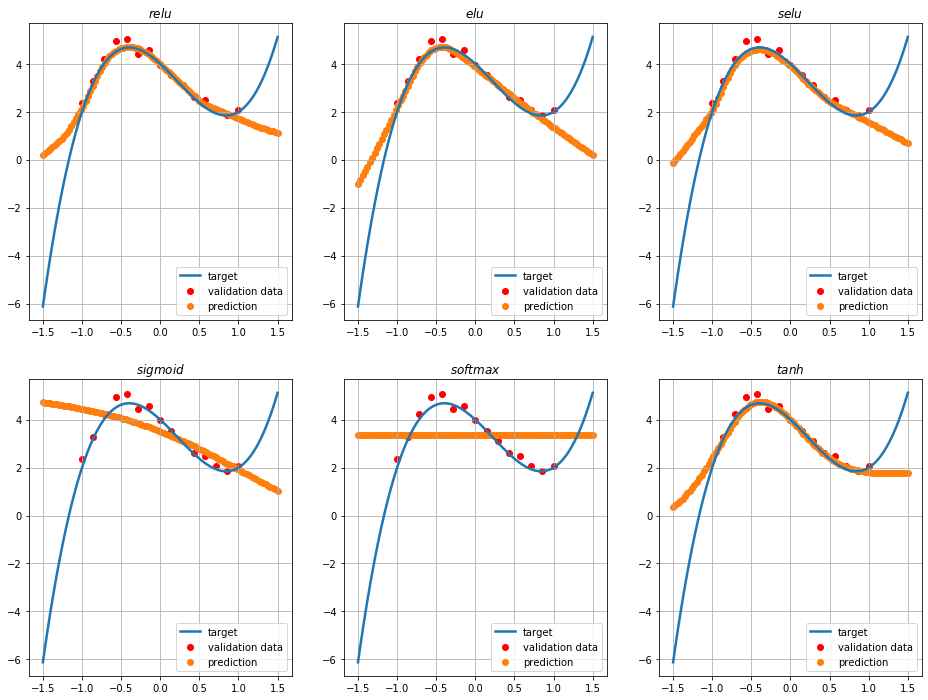

In [64]:
def target(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

plt.figure(figsize=(16, 12))
sub = [231, 232, 233, 234, 235, 236]
NN = ['relu', 'elu', 'selu', 'sigmoid', 'softmax', 'tanh']

sigma = 0.2
np.random.seed(0)
x_valid = np.linspace(-1, 1, 15)
y_valid = np.random.normal( target(x_valid), sigma )
x_predicted = np.linspace(-1.5, 1.5, 100)

for i in range(6):
    savedpath = "Saved/exercise2/Activation/model" + str(NN[i])
    model = tf.keras.models.load_model(filepath=savedpath)
    y_predicted = model.predict(x_predicted).reshape(-1)

    plt.subplot(sub[i])
    title = "$" + str(NN[i]) + "$"
    plt.title(title)
    plt.scatter(x_valid, y_valid, color='r', label='validation data') #dati per validazione    
    plt.scatter(x_predicted, y_predicted, color='tab:orange', label='prediction') #predizione NN
    plt.plot(x_predicted, target(x_predicted), label='target', lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

### <font color='blue'> Optimizer</font> 
Utilizzando la rete neurale più complessa, formata da 100 neuroni nel layer di input e 25 nel layer intermedio, valuto il comportamento della regressione variando l'ottimizzatore. Mantengo costanti le altre caratteristiche della rete, qui riportate:

- **Loss function**: mean squared error
- **Activation function**: funzione standard *relu*

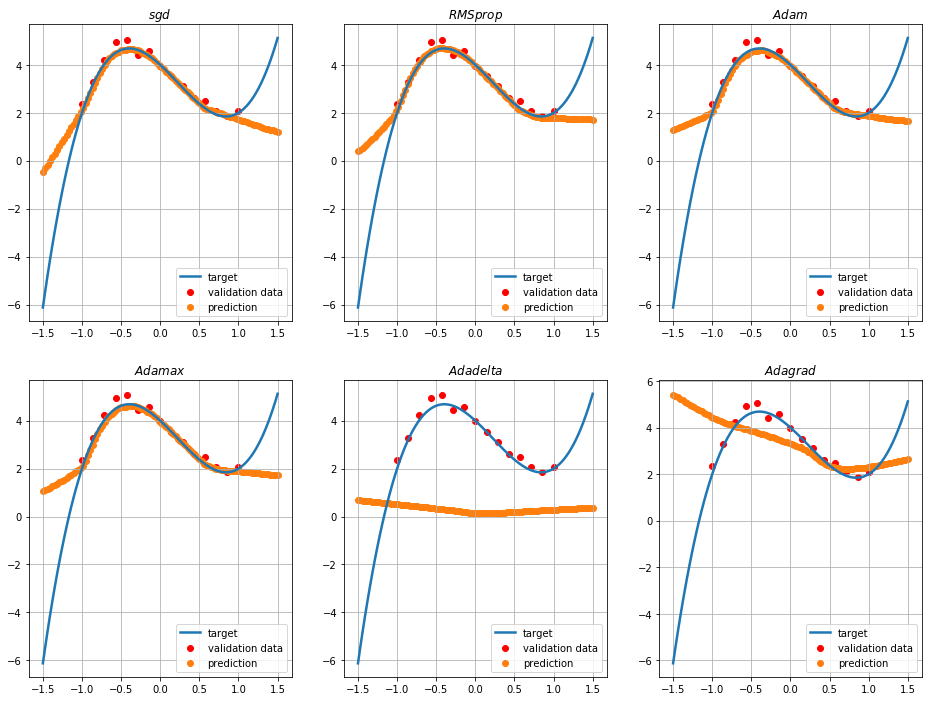

In [67]:
def target(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

plt.figure(figsize=(16, 12))
sub = [231, 232, 233, 234, 235, 236]
title = ['sgd', 'RMSprop', 'Adam', 'Adamax', 'Adadelta', 'Adagrad']


sigma = 0.2
np.random.seed(0)
x_valid = np.linspace(-1, 1, 15)
y_valid = np.random.normal( target(x_valid), sigma )
x_predicted = np.linspace(-1.5, 1.5, 100)

for i in range(6):
    savedpath = "Saved/exercise2/Optimizer/model" + str(title[i])
    model = tf.keras.models.load_model(filepath=savedpath)
    y_predicted = model.predict(x_predicted).reshape(-1)

    plt.subplot(sub[i])
    plt.title("$" + str(title[i]) + "$")
    plt.scatter(x_valid, y_valid, color='r', label='validation data') #dati per validazione    
    plt.scatter(x_predicted, y_predicted, color='tab:orange', label='prediction') #predizione NN
    plt.plot(x_predicted, target(x_predicted), label='target', lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

### <font color='blue'> Loss function</font> 
Utilizzando la rete neurale più complessa, formata da 100 neuroni nel layer di input e 25 nel layer intermedio, valuto il comportamento della regressione variando la loss function. Mantengo costanti le altre caratteristiche della rete qui riportate, utilizzando l'ottimizzatore *RMSprop* che, in base all'analisi precedente, fornisce risultati migliori:

- **Optimizer**: RMSprop
- **Activation function**: funzione standard *relu*

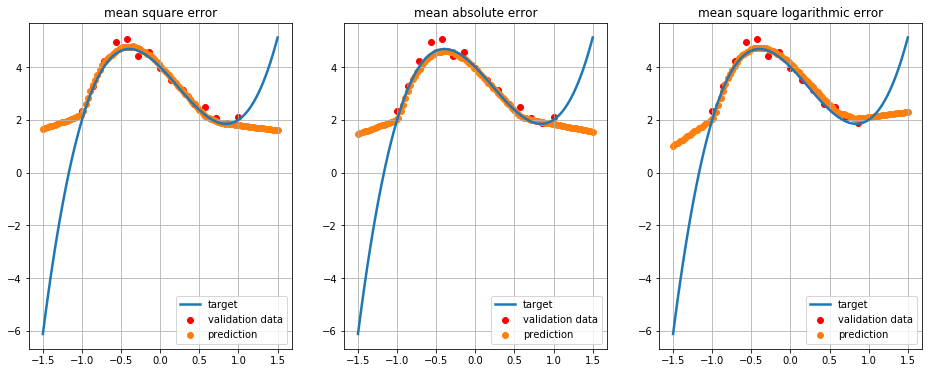

In [73]:
def target(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

plt.figure(figsize=(16, 6))
sub = [131, 132, 133]
name = ['mse', 'mae', 'msle']
title = ['mean square error', 'mean absolute error', 'mean square logarithmic error']

sigma = 0.2
np.random.seed(0)
x_valid = np.linspace(-1, 1, 15)
y_valid = np.random.normal( target(x_valid), sigma )
x_predicted = np.linspace(-1.5, 1.5, 100)

for i in range(3):
    savedpath = "Saved/exercise2/Loss/model" + str(name[i])
    model = tf.keras.models.load_model(filepath=savedpath)
    y_predicted = model.predict(x_predicted).reshape(-1)

    plt.subplot(sub[i])
    plt.title(title[i])
    plt.scatter(x_valid, y_valid, color='r', label='validation data') #dati per validazione    
    plt.scatter(x_predicted, y_predicted, color='tab:orange', label='prediction') #predizione NN
    plt.plot(x_predicted, target(x_predicted), label='target', lw=2.5) #funzione target
    plt.grid(True)
    plt.legend()
    
plt.show()

Come è lecito aspettarsi, la rete neurale effettua una regressione migliore aumentando la complessità della struttura e quindi il numero di parametri coinvolti. Si può osservare però che in tutti i casi il fit non ha un carattere predittivo in quanto, all'esterno dell'intervallo di training, la predizione risulta estremamente diversa rispetto alla funzione target.

## Exercise 11.3
Sviluppo una rete neurale per effettuare la regressione della funzione bidimensionale $f(x,y) = \sin(x^2+y^2) \,,$ nell'intervallo $x,y \in [-3/2,3/2]$. Costruisco la rete neurale ampliando quella testata nel caso precedente aggiungendo neuroni al layer iniziale e a quello intermedio: 

- *input layer*, composto da 200 neuroni
- *hidden layer*, composto 45
- *output lauer*, composto da un singolo neurone di output

Tutti gli strati sono densamente connessi perciò ogni neurone è connesso a tutti i neuroni dello strato precedente. Sulla base dei risultati ottenuti per la rete neurale dell'esercizio precedente, utilizzo la funzione di attivazione *relu*, l'ottimizzatore *RMSprop* e la loss function *mean squared error*. Lo specchietto sottostante riporta il codice usato per definire la rete neurale..

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
<font face="Courier">model = Sequential()</font><br />
<font face="Courier">model.add(Dense(units=200, input_dim=2, activation='relu')) </font><br />
<font face="Courier">model.add(Dense(units=45, activation='relu')) </font><br />
<font face="Courier">model.add(Dense(1))</font>
<font face="Courier">model.compile(optimizer='RMSprop', loss='mse', metrics=['mse']) </font><br />
</p>

Il seguente grafico mostra i risultati ottenuti per il fit bidimensionale utilizzando $150$ epoche, $1000$ valori di training e $100$ valori di validazione con un rumore medio $\sigma = 0.2$.

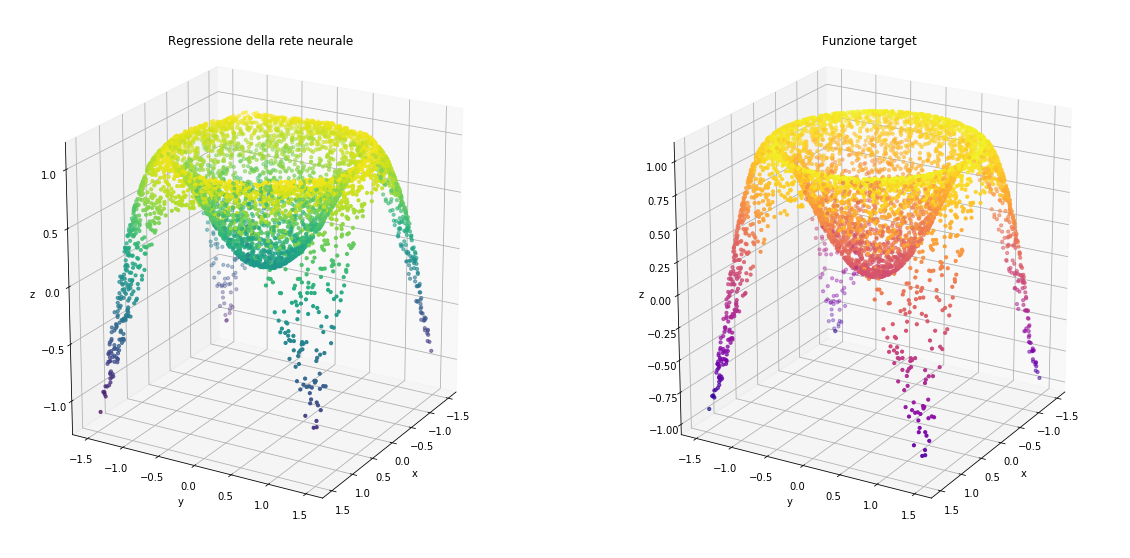

In [74]:
from mpl_toolkits.mplot3d import Axes3D

a = 1.5 #intervallo (x,y)
n = 5000 #numero di punti
fig=plt.figure(figsize=(20, 10))
model = tf.keras.models.load_model("Saved/exercise3/model2D")

x_predicted = np.zeros((n, 2))
for i in range(n):
    x_predicted[i,0] = np.random.uniform(-a, a)
    x_predicted[i,1] = np.random.uniform(-a, a)
y_predicted = model.predict(x_predicted).reshape(-1)

x = x_predicted[:,0]
y = x_predicted[:,1]
z = y_predicted[:]
ztarg = np.sin(x**2+y**2) #funzione target

ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(x, y, z, c=z, s=10) #predizione della rete neurale
ax.set_title('Regressione della rete neurale')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(20, 30)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.scatter(x, y, ztarg, c=z, cmap='plasma', s=10) #funzione target
ax.set_title('Funzione target')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(20, 30)

plt.show()